We check the data for columns with missing values

In [20]:
import pandas as pd
def normalize_data(data_sel):
    data_sel[['Departure_Date',
              'Return_Date',
              "Early_RPL",
              "Latest_RPL",
              'Initial_System_Date',
              'Deposit_Date',
               'FirstMeeting',
               'LastMeeting']] = data_sel[['Departure_Date',
              'Return_Date',
              "Early_RPL",
              "Latest_RPL",
              'Initial_System_Date',
              'Deposit_Date',
               'FirstMeeting',
               'LastMeeting']].apply(pd.to_datetime)
    print(str(data_sel['FPP_to_School_enrollment'].dtype))
    if(str(data_sel['FPP_to_PAX'].dtype)== 'object'):
        data_sel['FPP_to_PAX'] = data_sel['FPP_to_PAX'].fillna(value='0')
        data_sel['FPP_to_PAX'] = data_sel['FPP_to_PAX'].apply(lambda x: str(x.replace(',','.'))).astype(float) 
    if(str(data_sel['FPP_to_School_enrollment'].dtype)== 'object'):
        data_sel['FPP_to_School_enrollment'] = data_sel['FPP_to_School_enrollment'].fillna(value='0')
        data_sel['FPP_to_School_enrollment'] = data_sel['FPP_to_School_enrollment'].apply(lambda x: str(x.replace(',','.'))).astype(float) 
    if(str(data_sel['FRP_Take_up_percent_'].dtype)== 'object'):
        data_sel['FRP_Take_up_percent_'] = data_sel['FRP_Take_up_percent_'].fillna(value='0')
        data_sel['FRP_Take_up_percent_'] = data_sel['FRP_Take_up_percent_'].apply(lambda x: str(x.replace(',','.'))).astype(float) 
    if(str(data_sel['EZ_Pay_Take_Up_Rate'].dtype)== 'object'):
        data_sel['EZ_Pay_Take_Up_Rate'] = data_sel['EZ_Pay_Take_Up_Rate'].fillna(value='0')
        data_sel['EZ_Pay_Take_Up_Rate'] = data_sel['EZ_Pay_Take_Up_Rate'].apply(lambda x: str(x.replace(',','.'))).astype(float) 
    data_sel['From_Grade'] = data_sel['From_Grade'].fillna(data_sel['From_Grade'].median())
    data_sel['To_Grade'] = data_sel['To_Grade'].fillna(data_sel['To_Grade'].median())
    data_sel['SchoolSizeIndicator'] = data_sel['SchoolSizeIndicator'].fillna(data_sel['SchoolSizeIndicator'].mode()[0])
    data_sel["DifferenceTraveltoFirstMeeting"] = data_sel["DifferenceTraveltoFirstMeeting"].fillna(data_sel["DifferenceTraveltoFirstMeeting"].median())
    data_sel["DifferenceTraveltoLastMeeting"] = data_sel["DifferenceTraveltoLastMeeting"].fillna(data_sel["DifferenceTraveltoLastMeeting"].median())

    data_sel['CRM_Segment'] = data_sel['CRM_Segment'].fillna(data_sel['CRM_Segment'].mode()[0])
    data_sel['MDR_High_Grade'] = data_sel['MDR_High_Grade'].fillna(data_sel['MDR_High_Grade'].mode()[0])
    data_sel = data_sel.drop(columns=['Special_Pay'])
    data_sel = data_sel.drop(columns = ['FirstMeeting', 'LastMeeting', 'Latest_RPL', 'Early_RPL', 'Initial_System_Date','DepartureMonth','GroupGradeTypeLow','GroupGradeType','SchoolGradeType'])
    data_sel = data_sel[data_sel.DifferenceTraveltoLastMeeting>=0]
    data_sel = data_sel[data_sel.DifferenceTraveltoLastMeeting>=0]
    data_clean = data_sel.copy()
    orth = pd.get_dummies(data_clean,columns=['Region'],prefix=['Is_Region'])
    orth = pd.get_dummies(orth,columns=['School_Type'],prefix=['Is_School_Type'])
    orth = pd.get_dummies(orth,columns=['SPR_Product_Type'],prefix=['Is_SPR_Product_Type'])
    orth = pd.get_dummies(orth,columns=['Group_State'],prefix=['Is_Group_State'])
    orth = pd.get_dummies(orth,columns=['GroupGradeTypeHigh'],prefix=['Is_GroupGradeTypeHigh'])
    orth = pd.get_dummies(orth,columns=['MajorProgramCode'],prefix=['Is_MajorProgramCode'])
    orth = pd.get_dummies(orth,columns=['Program_Code'],prefix=['Is_Program_Code'])
    orth = pd.get_dummies(orth,columns=['Travel_Type'],prefix=['Is_Travel_Type'])
    orth = pd.get_dummies(orth,columns=['SchoolGradeTypeLow'],prefix=['Is_SchoolGradeTypeLow'])
    orth = pd.get_dummies(orth,columns=['SchoolGradeTypeHigh'],prefix=['Is_SchoolGradeTypeHigh'])
    orth = pd.get_dummies(orth,columns=['SchoolSizeIndicator'],prefix=['Is_SchoolSizeIndicator'])
    orth = pd.get_dummies(orth,columns=['MDR_Low_Grade'],prefix=['Is_MDR_Low_Grade'])
    orth = orth[orth.Income_Level != 'Z']
    orth = orth[orth.Poverty_Code != 'E']
    #categorize in ordered category
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    orth['Income_Level'] = labelencoder.fit_transform(orth['Income_Level'])
    orth['Poverty_Code'] = labelencoder.fit_transform(orth['Poverty_Code'])
    orth['Departure_Month'] = pd.DatetimeIndex(orth['Departure_Date']).month
    orth['Return_Month'] = pd.DatetimeIndex(orth['Return_Date']).month
    orth['Deposit_Days'] = (orth['Departure_Date'] - orth['Deposit_Date']).dt.days 
    #scale numeric categories to be analyzed
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    orth[['Income_Level','Poverty_Code','To_Grade','Days','NumberOfMeetingswithParents']] = scaler.fit_transform(orth[['Income_Level','Poverty_Code','To_Grade','Days','NumberOfMeetingswithParents']])
    scaler = StandardScaler()
    orth[['FPP','From_Grade','Cancelled_Pax','Total_Discount_Pax','Total_Pax']] = scaler.fit_transform(orth[['FPP','From_Grade','Cancelled_Pax','Total_Discount_Pax','Total_Pax']])
    #data_clean.boxplot(column=['FPP','From_Grade','Cancelled_Pax','Total_Discount_Pax','Total_Pax'])
    orth[['FPP_to_School_enrollment','Tuition','FRP_Active','FRP_Cancelled','FRP_Take_up_percent_']] = scaler.fit_transform(orth[['FPP_to_School_enrollment','Tuition','FRP_Active','FRP_Cancelled','FRP_Take_up_percent_']])
    #data_clean.boxplot(column=['FPP_to_School_enrollment','Tuition','FRP_Active','FRP_Cancelled','FRP_Take_up_percent_'])
    orth[['EZ_Pay_Take_Up_Rate','School_Sponsor','SPR_Group_Revenue','FPP_to_PAX','Num_of_Non_FPP_PAX']] = scaler.fit_transform(orth[['EZ_Pay_Take_Up_Rate','School_Sponsor','SPR_Group_Revenue','FPP_to_PAX','Num_of_Non_FPP_PAX']])
    #data_clean.boxplot(column=['EZ_Pay_Take_Up_Rate','School_Sponsor','SPR_Group_Revenue','FPP_to_PAX','Num_of_Non_FPP_PAX'])
    #NB: 'MDR_Low_Grade' has K,PK? DifferenceTraveltoFirstMeeting <0, DifferenceTraveltoLasttMeeting<0
    orth[['CRM_Segment','MDR_High_Grade','Total_School_Enrollment','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting','Departure_Month','Return_Month','Deposit_Days']] = scaler.fit_transform(orth[['CRM_Segment','MDR_High_Grade','Total_School_Enrollment','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting','Departure_Month','Return_Month','Deposit_Days']])
    #orth.boxplot(column=['CRM_Segment','MDR_High_Grade','Total_School_Enrollment','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting'])

    
    #remove dates and put Retained as last column
    to_drop = [col for col in data_sel.columns if 'Date' in col or 'RPL' in col]
   
    orth = orth.drop(to_drop, axis=1)
    retained = orth.pop('Retained')
    orth.insert(orth.shape[1], 'Retained', retained)
    
    return orth


In [27]:
import pandas as pd
import os as os
import datetime as dt
wd = os.getcwd()
data_sel = normalize_data( pd.read_csv(wd + "\merge_model_full.csv") )
data_sel.to_csv("merge_model_full_normalized.csv", index=False)

object


d:\projects\jupiter\venv\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


['Total_Pax', 'SPR_Group_Revenue', 'Num_of_Non_FPP_PAX']


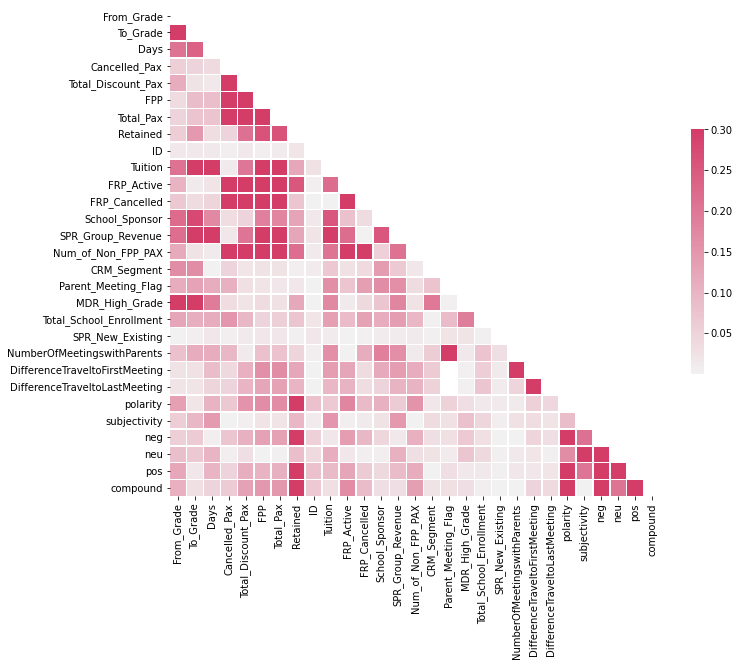

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_sel = pd.read_csv(wd + "\merge_model_full.csv")
corr = data_sel.corr().abs()

corr.to_csv(wd + "\correlations.csv", index=False)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})
#plt.matshow(data_sel.corr())
#plt.show()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
 
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)